In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


In [0]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix'

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
ls data/

men_shoes.csv  shoes_prices.csv


In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_prices = np.mean(df['prices_amountmin'])
mean_prices

93.53952188183217

In [0]:
[3] * 5

[3, 3, 3, 3, 3]

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_prices] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

63.968341227870624

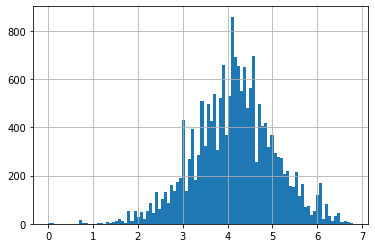

In [0]:
 np.log(df['prices_amountmin'] + 1).hist(bins=100)

In [0]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.01120240700219

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.03539547661041

In [0]:
df.brand.value_counts()

Nike             1709
PUMA              574
Ralph Lauren      524
New Balance       361
VANS              356
                 ... 
AllSaints           1
J. Fold             1
Fat Doxie           1
Shoe Goo            1
RYAN SEACREST       1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model,X,y, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

-58.38655694633361 4.223555478221712


In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model,X,y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)
  

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
run_model(['brand_cat','manufacturer_cat'])

(-58.53930419908595, 4.3112232316154255)

In [0]:
ls